<p align="center">
  <img src="https://www.cheyenneregional.org/wp-content/uploads/2023/03/2021-stroke-infographic-prevention-1536x917-1.jpg" width="80%">
</p>


## SUMMARY

1. [Introduction](#scrollTo=Zw74BDGe8APQ&line=1&uniqifier=1)  
2. [Importing Libraries](#scrollTo=GqbMm5amX1e9&line=1&uniqifier=1)  
3. [Loading the Dataset](#scrollTo=fgcBfkJ5Zcu9&line=1&uniqifier=1)  
4. [Exploratory Data Analysis (EDA)](#scrollTo=PcXjaSVTq1mD&line=1&uniqifier=1)  
5. [Data Preprocessing](#scrollTo=AP-XGYBb09pT&line=1&uniqifier=1)  
6. [Model Selection and Training](#scrollTo=iXTTRrzSeopK&line=1&uniqifier=1)  
7. [Hyperparameter Tuning](#scrollTo=mbgxpmZ_eziI&line=1&uniqifier=1)  
8. [Model Evaluation](#scrollTo=PJnUGZPqffG9&line=1&uniqifier=1)  
9. [Prediction and Results](#scrollTo=nP7Dz-t_-thl&line=1&uniqifier=1)  
10. [Conclusion and Future Work](#conclusion-and-future-work)

## Introduction

**Stroke** is a medical condition that occurs when the blood supply to part of the brain is interrupted, leading to brain cell damage.
It is one of the leading causes of death and disability worldwide, affecting **1 in 4** people during their lifetime. Early detection and prediction of stroke risk can help reduce its impact and save lives.

<br>

### Project Aims 🎯

The primary goals of this project are:

- Explore and analyze the dataset using different visualization methods to identify key trends and patterns.
- Build a machine learning model capable of predicting stroke risk based on various health-related factors.
- Evaluate the effectiveness of different preprocessing techniques and their impact on model performance.
- Train and save the model for future deployment, enabling predictions on new, unseen data.

<br>

### Attribute Information 📂

- **id**: unique identifier
- **gender**: "Male", "Female" or "Other"
- **age**: age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married**: "No" or "Yes"
- **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: "Rural" or "Urban"
- **avg_glucose_level**: average glucose level in blood
- **bmi**: body mass index => weight in kilograms / the square of height in meters
- **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"
- **stroke**: 1 if the patient had a stroke or 0 if not



## Importing Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer

# Machine Learning utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Data balancing techniques (imbalanced-learn)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Model saving/loading utilities
import joblib

# For tabular data display
!pip install tabulate
from tabulate import tabulate

# SHAP
!pip install shap
import shap

#PDP
from sklearn.inspection import PartialDependenceDisplay

## Loading the Dataset

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.shape)
df.head()

(5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
# df = df[(df['age'] >= 65) & (df['age'] <= 80)]
# print(df.shape)
# df.head()

## Exploratory Data Analysis (EDA)

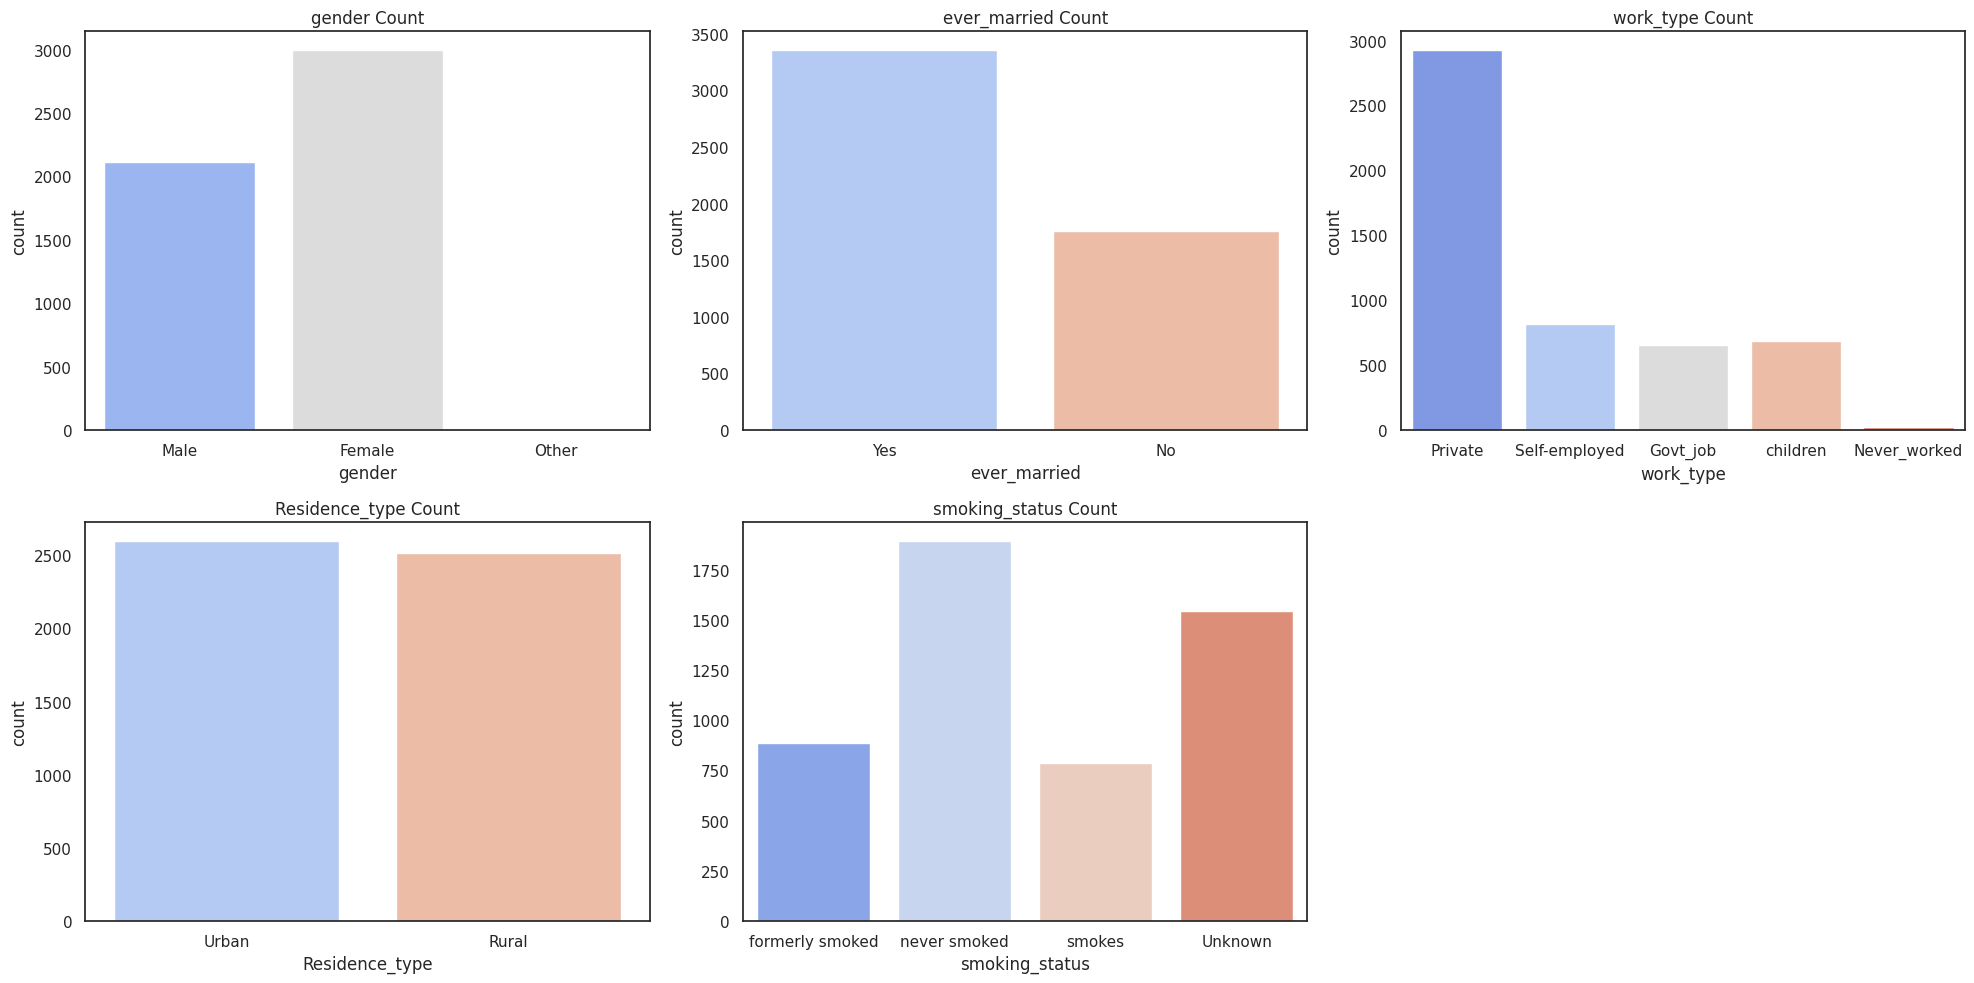

In [4]:
# Set Seaborn style to 'white' for clean background
sns.set(style='white')

# Create a figure with white background
fig = plt.figure(figsize=(20, 10))

# Define grid size
columns = 3
rows = 2

# Categorical columns
cat = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop to create subplots
for i in range(1, len(cat) + 1):
    ax = fig.add_subplot(rows, columns, i)
    sns.countplot(x=df[cat[i-1]], hue=df[cat[i-1]], palette='coolwarm', legend=False, ax=ax)
    ax.set_title(f'{cat[i-1]} Count')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

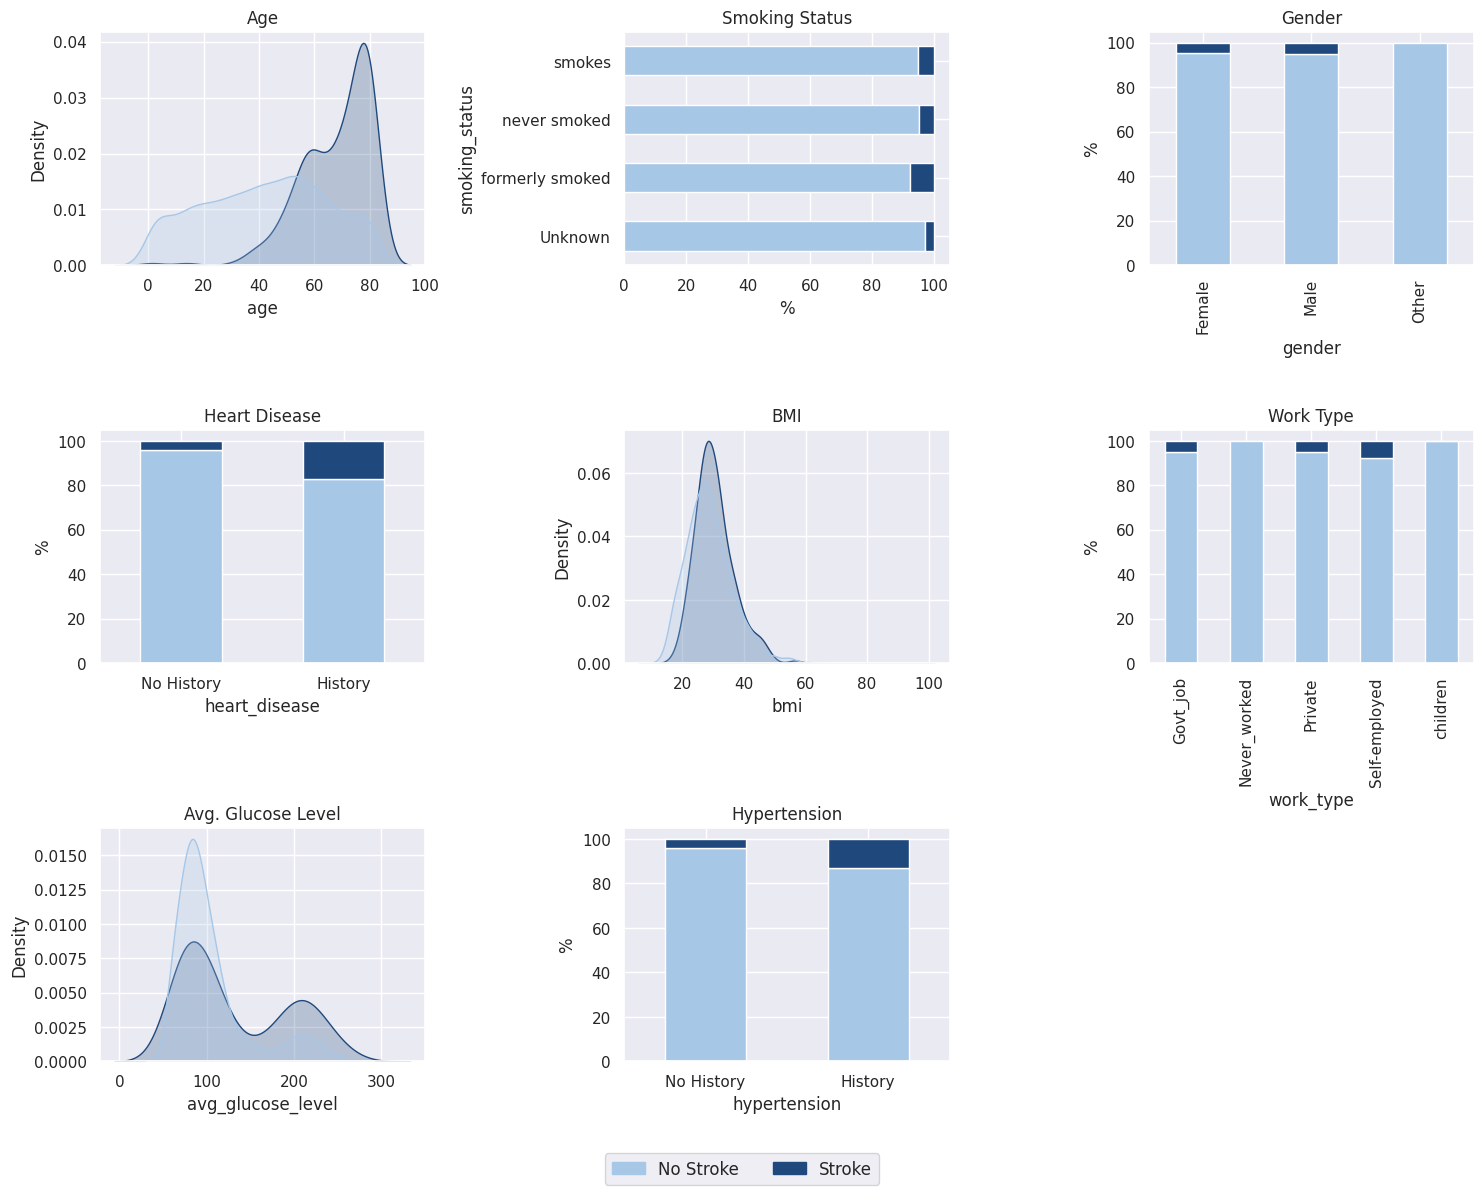

In [5]:
# Set seaborn style
sns.set_style("darkgrid")

# Define colors
dark_blue = "#1f497d"
light_blue = "#a7c7e7"
colors = [light_blue, dark_blue]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Age Distribution
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, ax=axes[0], palette=colors)
axes[0].set_title("Age")

# Smoking Status
smoking_pct = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100
smoking_pct.plot(kind='barh', stacked=True, color=colors, ax=axes[1])
axes[1].set_title("Smoking Status")
axes[1].set_xlabel("%")

# Gender Distribution
gender_pct = df.groupby('gender')['stroke'].value_counts(normalize=True).unstack() * 100
gender_pct.plot(kind='bar', stacked=True, color=colors, ax=axes[2])
axes[2].set_title("Gender")
axes[2].set_ylabel("%")

# Heart Disease
heart_pct = df.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack() * 100
heart_pct.plot(kind='bar', stacked=True, color=colors, ax=axes[3])
axes[3].set_title("Heart Disease")
axes[3].set_ylabel("%")
axes[3].set_xticklabels(['No History', 'History'], rotation=0)

# BMI Distribution
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, ax=axes[4], palette=colors)
axes[4].set_title("BMI")

# Work Type
work_pct = df.groupby('work_type')['stroke'].value_counts(normalize=True).unstack() * 100
work_pct.plot(kind='bar', stacked=True, color=colors, ax=axes[5])
axes[5].set_title("Work Type")
axes[5].set_ylabel("%")

# Glucose Level Distribution
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, ax=axes[6], palette=colors)
axes[6].set_title("Avg. Glucose Level")

# Hypertension
hypertension_pct = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack() * 100
hypertension_pct.plot(kind='bar', stacked=True, color=colors, ax=axes[7])
axes[7].set_title("Hypertension")
axes[7].set_ylabel("%")
axes[7].set_xticklabels(['No History', 'History'], rotation=0)

# Remove individual legends
for ax in axes[:-1]:
    try:
        legend = ax.get_legend()
        if legend:
            legend.remove()
    except:
        pass

axes[-1].axis("off")

# Global legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = ['No Stroke', 'Stroke']
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

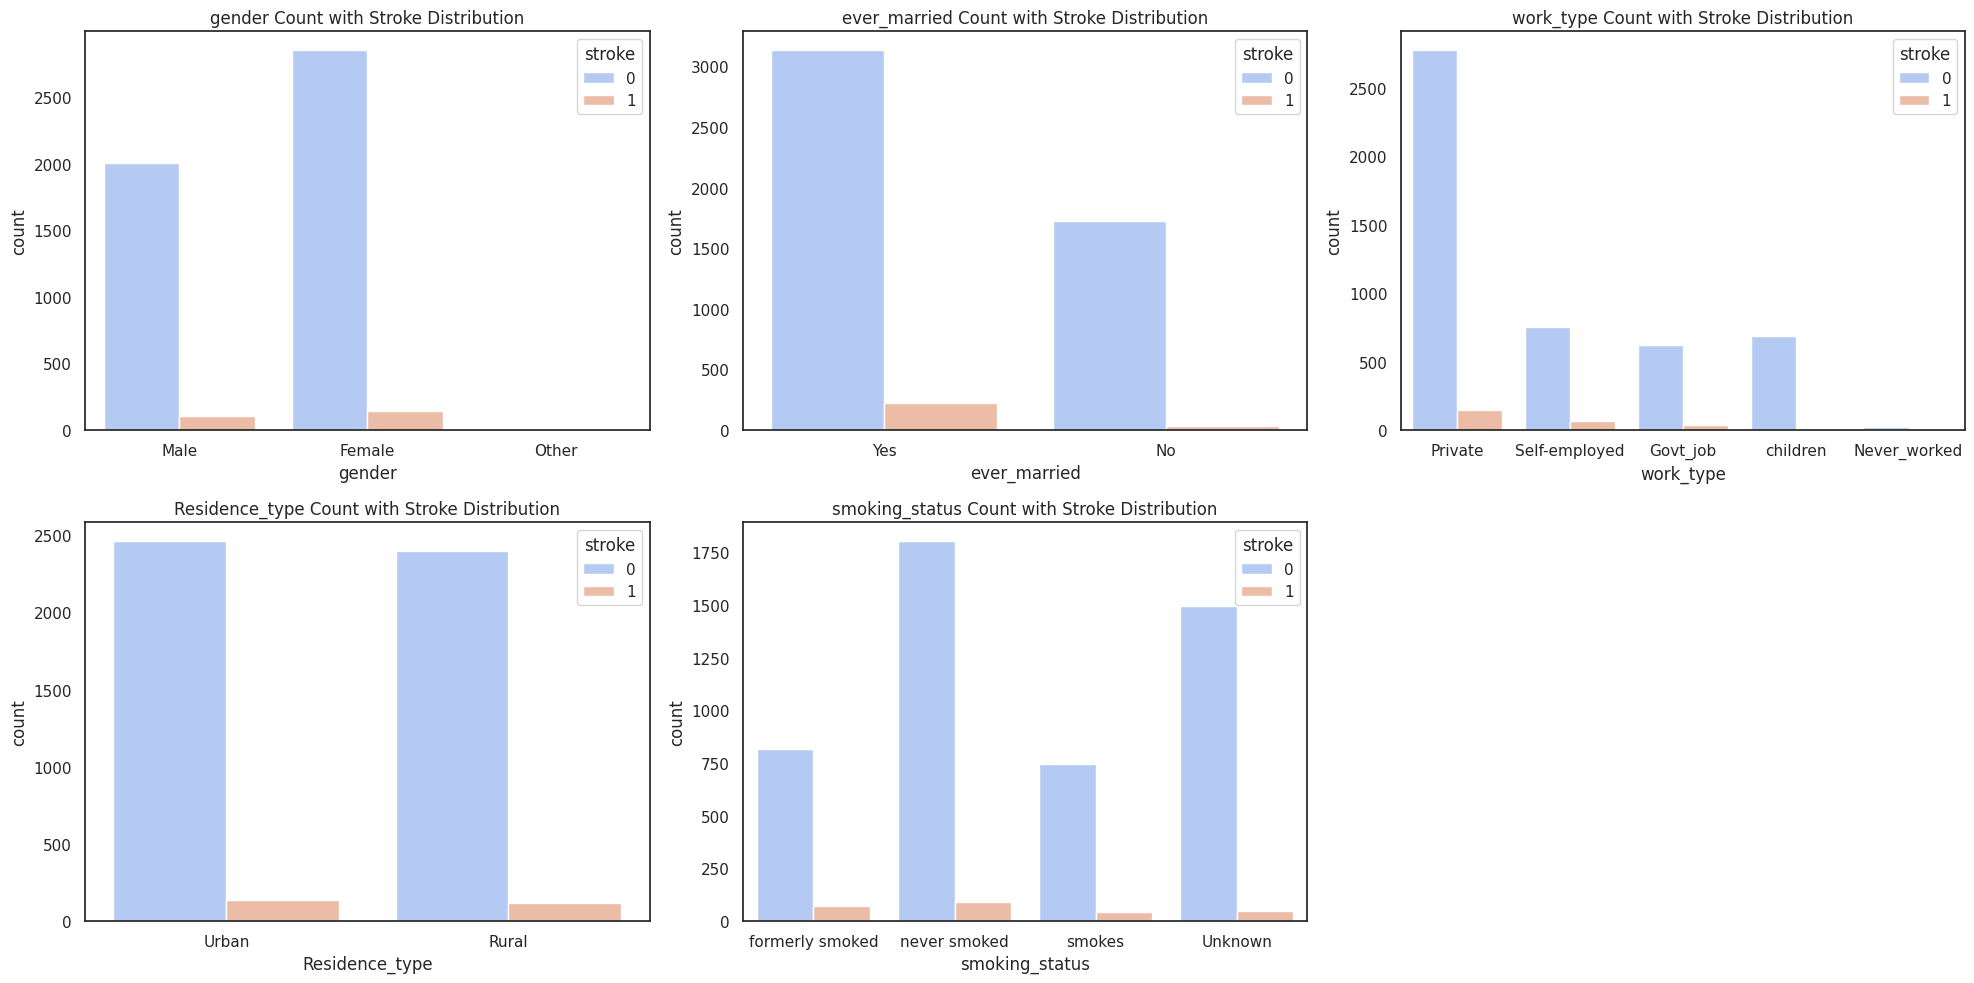

In [6]:
# Set Seaborn style to 'white' for clean background
sns.set(style='white')

# Create a figure with white background
fig = plt.figure(figsize=(20, 10))

# Define grid size
columns = 3
rows = 2

# Categorical columns
cat = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop to create subplots
for i in range(1, len(cat) + 1):
    ax = fig.add_subplot(rows, columns, i)
    sns.countplot(x=df[cat[i-1]], hue=df["stroke"], palette='coolwarm', dodge=True, ax=ax)
    ax.set_title(f'{cat[i-1]} Count with Stroke Distribution')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

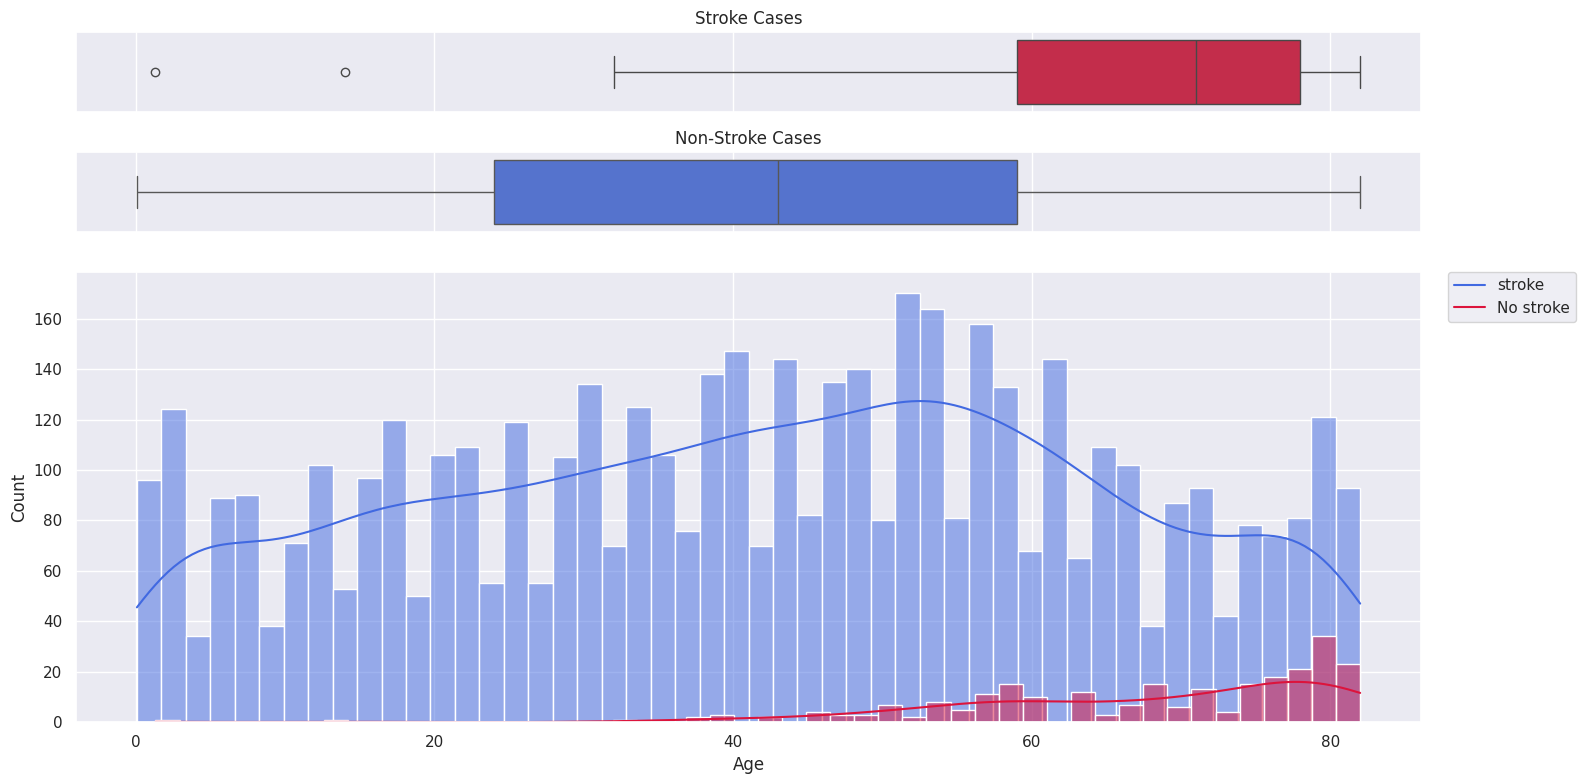

In [7]:
# Set style
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# Create figure and axes
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Boxplot for Stroke cases (Age)
sns.boxplot(x=df[df['stroke'] == 1]["age"], ax=ax_box1, color="crimson")
ax_box1.set(xlabel='', title="Stroke Cases")

# Boxplot for Non-Stroke cases (Age)
sns.boxplot(x=df[df['stroke'] == 0]["age"], ax=ax_box2, color="royalblue")
ax_box2.set(xlabel='', title="Non-Stroke Cases")

# Histogram with KDE for both Stroke and Non-Stroke cases (Age)
sns.histplot(df[df['stroke'] == 0], x="age", ax=ax_hist, kde=True, color="royalblue", bins=50, label="No stroke")
sns.histplot(df[df['stroke'] == 1], x="age", ax=ax_hist, kde=True, color="crimson", bins=50, label="Stroke")

# Customize x-axis and legend
ax_hist.set(xlabel="Age", ylabel="Count")
ax_hist.legend(title='', loc=2, labels=['stroke', 'No stroke'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

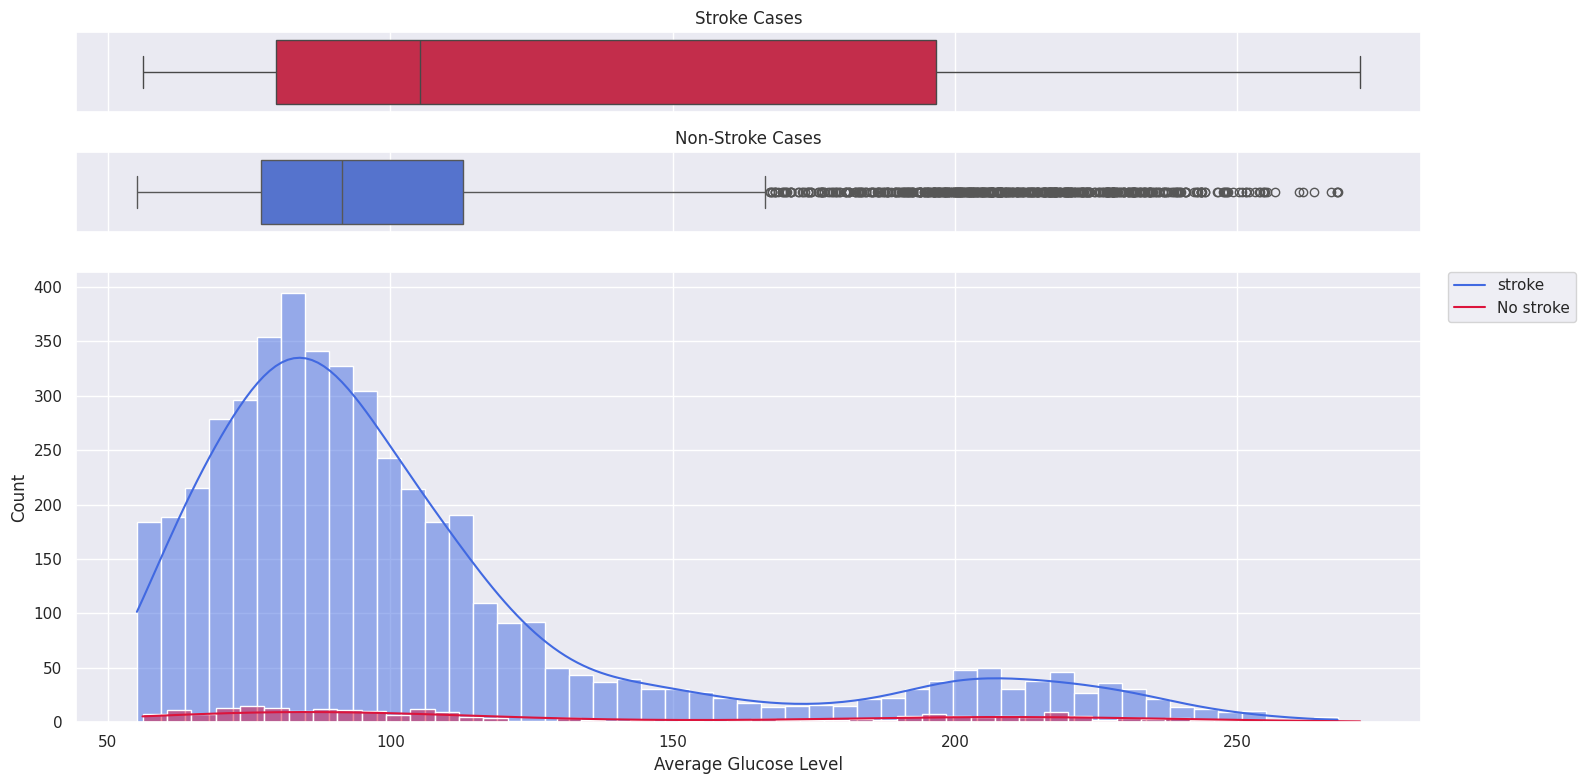

In [8]:
# Set style
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# Create figure and axes
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Boxplot for Stroke cases (avg_glucose_level)
sns.boxplot(x=df[df['stroke'] == 1]["avg_glucose_level"], ax=ax_box1, color="crimson")
ax_box1.set(xlabel='', title="Stroke Cases")

# Boxplot for Non-Stroke cases (avg_glucose_level)
sns.boxplot(x=df[df['stroke'] == 0]["avg_glucose_level"], ax=ax_box2, color="royalblue")
ax_box2.set(xlabel='', title="Non-Stroke Cases")

# Histogram with KDE for both Stroke and Non-Stroke cases (avg_glucose_level)
sns.histplot(df[df['stroke'] == 0], x="avg_glucose_level", ax=ax_hist, kde=True, color="royalblue", bins=50, label="No stroke")
sns.histplot(df[df['stroke'] == 1], x="avg_glucose_level", ax=ax_hist, kde=True, color="crimson", bins=50, label="Stroke")

# Customize x-axis and legend
ax_hist.set(xlabel="Average Glucose Level", ylabel="Count")
ax_hist.legend(title='', loc=2, labels=['stroke', 'No stroke'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

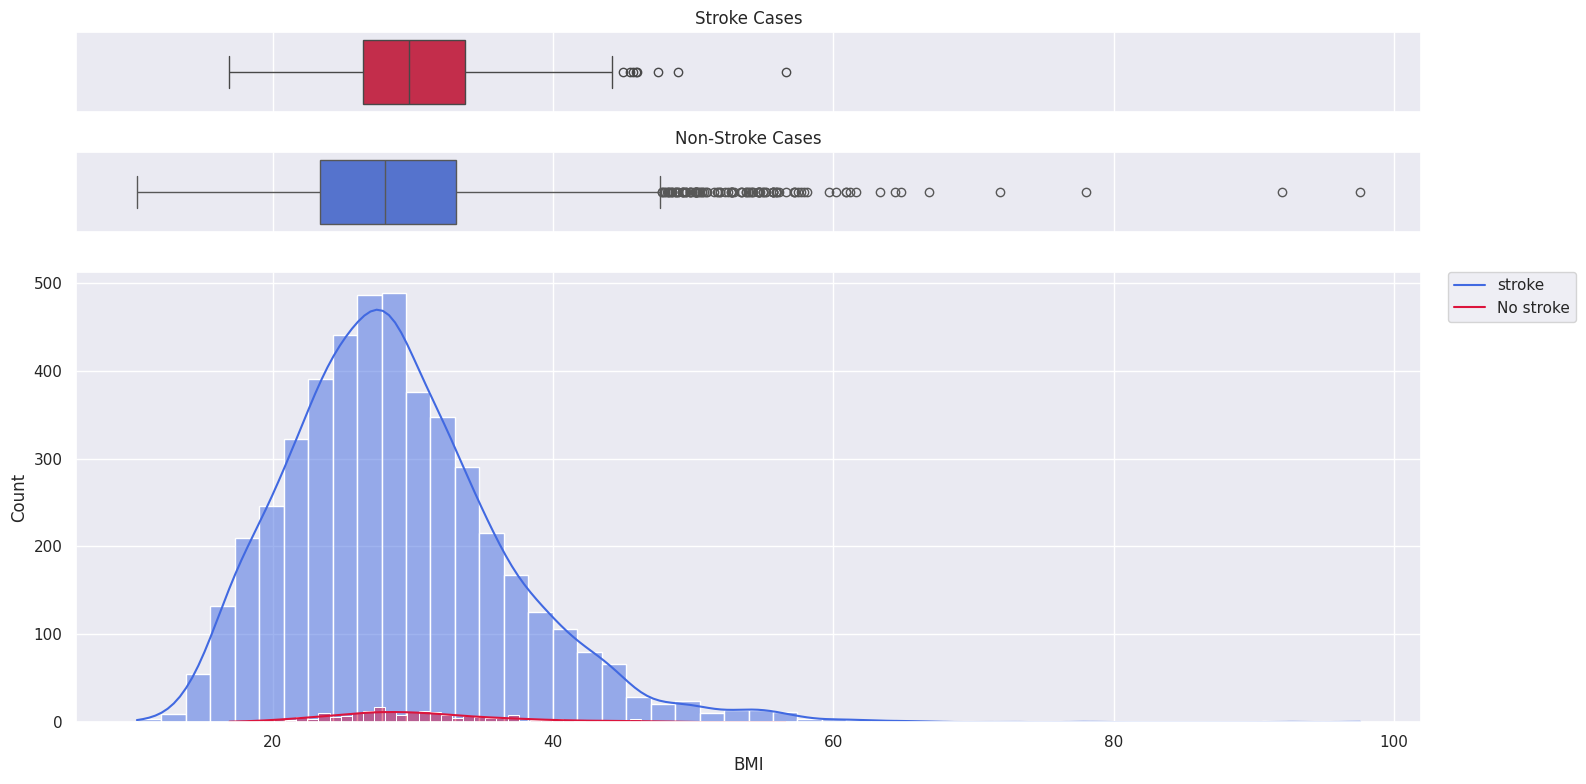

In [9]:
# Set style
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# Create figure and axes
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

# Boxplot for Stroke cases
sns.boxplot(x=df[df['stroke'] == 1]["bmi"], ax=ax_box1, color="crimson")
ax_box1.set(xlabel='', title="Stroke Cases")

# Boxplot for Non-Stroke cases
sns.boxplot(x=df[df['stroke'] == 0]["bmi"], ax=ax_box2, color="royalblue")
ax_box2.set(xlabel='', title="Non-Stroke Cases")

# Histogram with KDE for both Stroke and Non-Stroke cases
sns.histplot(df[df['stroke'] == 0], x="bmi", ax=ax_hist, kde=True, color="royalblue", bins=50, label="No stroke")
sns.histplot(df[df['stroke'] == 1], x="bmi", ax=ax_hist, kde=True, color="crimson", bins=50, label="Stroke")

# Customize x-axis and legend
ax_hist.set(xlabel="BMI", ylabel="Count")
ax_hist.legend(title='', loc=2, labels=['stroke', 'No stroke'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

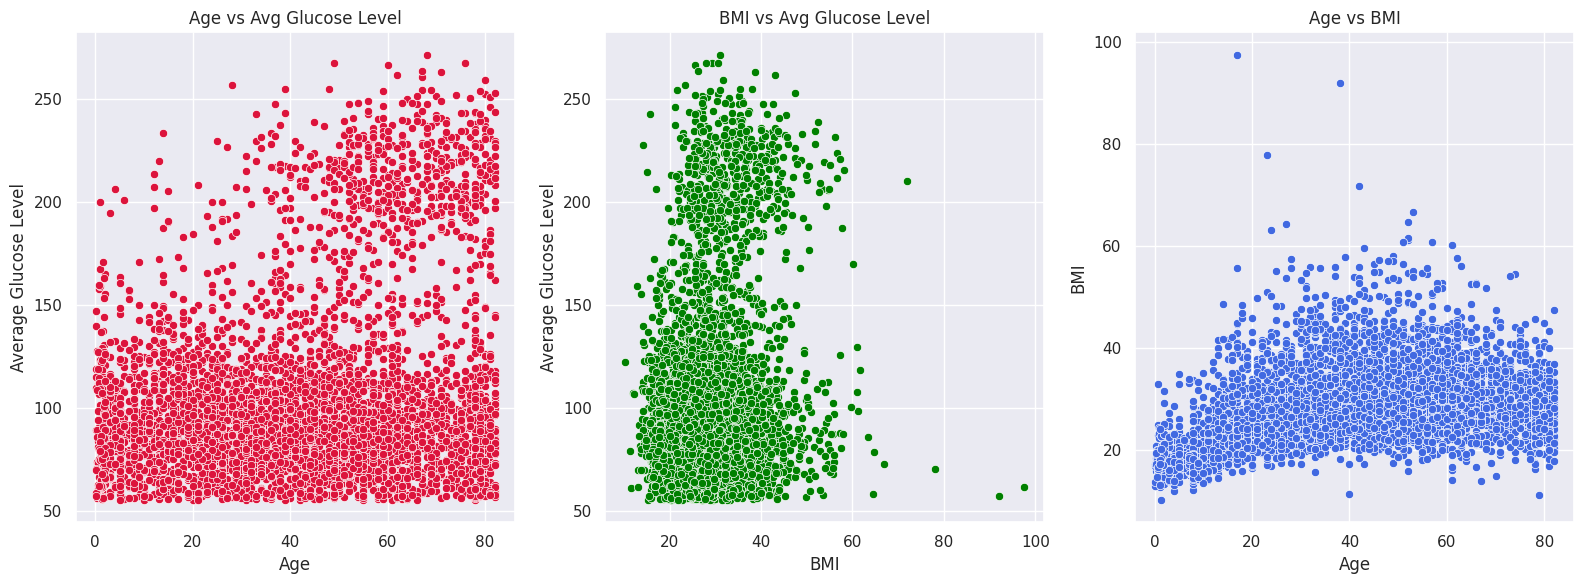

In [10]:
# Set style
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# Create figure and axes for scatter plots
f, axes = plt.subplots(1, 3, sharey=False, figsize=(16, 6))

# Scatter plot for age vs avg_glucose_level
sns.scatterplot(data=df, x="age", y="avg_glucose_level", ax=axes[0], color="crimson")
axes[0].set(title="Age vs Avg Glucose Level", xlabel="Age", ylabel="Average Glucose Level")

# Scatter plot for bmi vs avg_glucose_level
sns.scatterplot(data=df, x="bmi", y="avg_glucose_level", ax=axes[1], color="green")
axes[1].set(title="BMI vs Avg Glucose Level", xlabel="BMI", ylabel="Average Glucose Level")

# Scatter plot for age vs bmi
sns.scatterplot(data=df, x="age", y="bmi", ax=axes[2], color="royalblue")
axes[2].set(title="Age vs BMI", xlabel="Age", ylabel="BMI")

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Create Pie Chart
fig = px.pie(df,
             names=df['stroke'].map({0: "No Stroke", 1: "Stroke"}),
             title='The Ratio of Stroke',
             template='plotly_white',
             color=df['stroke'].map({0: "No Stroke", 1: "Stroke"}),
             color_discrete_map={"No Stroke": "royalblue", "Stroke": "crimson"})

# Update Traces
fig.update_traces(rotation=90, pull=[0.1], textinfo="percent+label")

# Show Plot
fig.show()

## Data Preprocessing

Basic Information About the Dataset

In [12]:
print("Rows     : " , df.shape[0])
print("Columns  : " , df.shape[1])
print("\nColumn Names:\n", df.columns.to_list())
print("\nDataset Info:")
df.info()

Rows     :  5110
Columns  :  12

Column Names:
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64 

Remove Id Column and Filter Gender Data

In [13]:
df.drop('id', axis='columns', inplace=True)

df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

Check for Duplicate Records

In [14]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Remove Duplicates If Any Exist

In [15]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed!")

Check for Missing Values

In [16]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Handle Missing Values

In [17]:
columns_for_imputation = ['bmi']
df_bmi = df[columns_for_imputation]

imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

imputed_bmi = imputer.fit_transform(df_bmi)

df['bmi'] = imputed_bmi
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Encoding with LabelEncoder

In [18]:
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col in categorical_columns:
    print(f"Classes for '{col}': {label_encoders[col].classes_}")

df.head()

Classes for 'gender': ['Female' 'Male']
Classes for 'ever_married': ['No' 'Yes']
Classes for 'work_type': ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Classes for 'Residence_type': ['Rural' 'Urban']
Classes for 'smoking_status': ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1             228.69  36.60000               1       1  
1               0             202.21  28.89456               2       1  
2               0             105.92  32.50000               2       1  
3               1             171.23  34.40000               3       1  
4               0             174.12  24.00000               2       1

Balance the Dataset

In [19]:
def resample_data(X, y, technique):
    if technique == "UnderSampling":
        sampler = RandomUnderSampler(random_state=42)
    elif technique == "SMOTE":
        sampler = SMOTE(random_state=42)
    elif technique == "OverSampling":
        sampler = RandomOverSampler(random_state=42)

    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

Scale and Split the Dataset

In [20]:
def scale_and_split(X, y, technique):
    # Initialize the scaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)

    # Resample data
    X_resampled, y_resampled = resample_data(X_scaled, y, technique)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled,
        y_resampled,
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test

Correlational Matrix

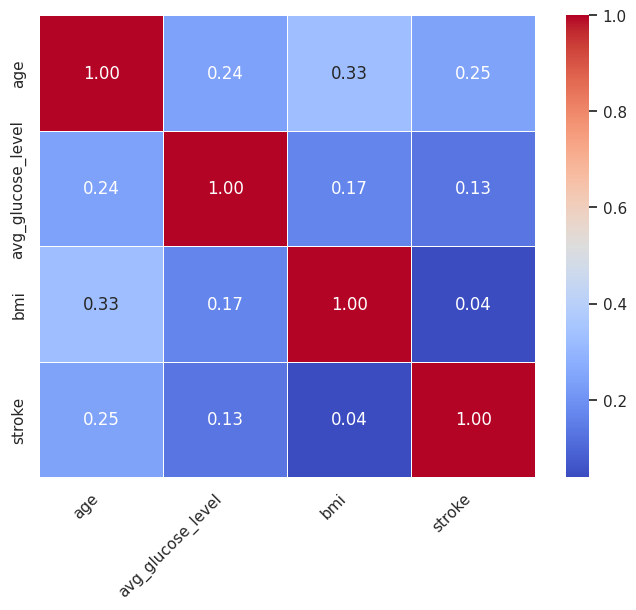

In [21]:
# Select only numerical columns for correlation
num_cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the heatmap
plt.show()

## Model Selection and Training

In [22]:
# Initialize models
models = {
    'rf': RandomForestClassifier(random_state=1234),
    'svm': SVC(probability=True, random_state=1234),
    'logreg': LogisticRegression(random_state=1234),
    'dt': DecisionTreeClassifier(random_state=1234),
    'xgb': XGBClassifier(random_state=1234, eval_metric='logloss')
}

Train the Models with Imbalanced Dataset

In [23]:
# Prepare the features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train, predict, and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict with the model
    y_pred = model.predict(X_test)

    # Print the results for each model
    print(f'--- {name} Model ---')
    print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy score
    print(classification_report(y_test, y_pred))  # Precision, Recall, F1-Score report
    print('-' * 50)

--- rf Model ---
Accuracy: 0.9373776908023483
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

--------------------------------------------------
--- svm Model ---
Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

--------------------------------------------------
--- logreg Model ---
Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

--- xgb Model ---
Accuracy: 0.9324853228962818
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.32      0.10      0.15        62

    accuracy                           0.93      1022
   macro avg       0.63      0.54      0.56      1022
weighted avg       0.91      0.93      0.92      1022

--------------------------------------------------


## Hyperparameter Tuning

In [24]:
# Define parameter grids for all models
param_grids = {
    'rf': {
        'n_estimators': [10, 50, 100],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', None],
        'bootstrap': [True],
        'criterion': ['gini']
    },
    'svm': {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'degree': [2, 3],
        'shrinking': [True],
        'class_weight': [None]
    },
    'logreg': {
        'penalty': ['l2'],
        'C': [0.1, 1, 10],
        'solver': ['lbfgs'],
        'fit_intercept': [True],
        'max_iter': [1000],
        'class_weight': [None]
    },
    'dt': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'xgb': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

In [25]:
def train_models(X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"\nTraining and evaluating {name} model...")

        # Perform RandomizedSearchCV
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            cv=3,
            random_state=1234,
            n_iter=3,
            n_jobs=-1
        ).fit(X_train, y_train)

        best_model = search.best_estimator_

        # Evaluate performance
        train_accuracy = best_model.score(X_train, y_train)
        test_accuracy = best_model.score(X_test, y_test)

        # Cross-validation score
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
        cv_mean = np.mean(cv_scores)
        cv_std = np.std(cv_scores)

        # Debugging prints
        print(f"Best parameters: {search.best_params_}")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Cross-Validation Mean: {cv_mean:.4f}, Std: {cv_std:.4f}")

        # Make predictions and get classification report
        y_pred = best_model.predict(X_test)
        class_report = classification_report(y_test, y_pred)

        # Check for feature importance (only for tree-based models or models that support it)
        if hasattr(best_model, "feature_importances_"):
            importances = best_model.feature_importances_
            print(f"Feature Importances for {name}: {importances}")
        else:
            importances = None
            print(f"Feature Importances not available for {name}.")

        # Store all results properly
        results[name] = {
            "model": best_model,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "cv_mean": cv_mean,
            "cv_std": cv_std,
            "classification_report": class_report,
            "feature_importances": importances  # Add feature importances to the results
        }

    return results

## Model Evaluation

In [26]:
def balance_data(X, y):
    sampling_techniques = ["UnderSampling", "SMOTE", "OverSampling"]
    all_results = {}
    all_train_data = {}

    for technique in sampling_techniques:
        print(f"\n{'='*50}\nEvaluating models with {technique}\n{'='*50}")

        # Split the scaled data
        X_train, X_test, y_train, y_test = scale_and_split(X, y, technique)

        # Train the models
        technique_results = train_models(X_train, X_test, y_train, y_test)

        # Store results for this technique
        all_results[technique] = technique_results
        all_train_data[technique] = (X_train, y_train)

    return all_results, all_train_data

In [27]:
def print_results_pretty(results, technique):
    print(f"\n{'='*60}\nResults for {technique} Balancing Technique\n{'='*60}\n")

    print(f"{'Model':<15}{'Training Accuracy':<20}{'Test Accuracy':<15}{'Cross-Validation Score':<25}")
    print("-" * 75)

    for model_name, metrics in results.items():
        train_acc = metrics.get('train_accuracy', 'N/A')
        test_acc = metrics.get('test_accuracy', 'N/A')
        cv_mean = metrics.get('cv_mean', 'N/A')
        cv_std = metrics.get('cv_std', 'N/A')

        train_acc_str = f'{train_acc:.4f}' if isinstance(train_acc, float) else str(train_acc)
        test_acc_str = f'{test_acc:.4f}' if isinstance(test_acc, float) else str(test_acc)
        cv_score_str = f'{cv_mean:.4f} (+/- {cv_std:.4f})' if isinstance(cv_mean, float) and isinstance(cv_std, float) else 'N/A'

        print(f"{model_name:<15}{train_acc_str:<20}{test_acc_str:<15}{cv_score_str:<25}")

    print("\nClassification Reports:")
    for model_name, metrics in results.items():
        print(f"\n{'-'*60}")
        print(f"Classification Report for {model_name}:")
        print(metrics.get("classification_report", "No report available"))
        print(f"{'-'*60}")

        # Check and print feature importances if available
        feature_importances = metrics.get("feature_importances", None)
        if feature_importances is not None:
            print(f"Feature Importances for {model_name}:")
            # Assuming the feature names are available in X_train.columns
            feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(len(feature_importances))]
            for name, importance in zip(feature_names, feature_importances):
                print(f"{name:<20}: {importance:.4f}")
            print(f"{'-'*60}")

In [28]:
# Prepare the features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

results, train_data = balance_data(X, y)


Evaluating models with UnderSampling

Training and evaluating rf model...
Best parameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Training Accuracy: 0.9523
Test Accuracy: 0.7400
Cross-Validation Mean: 0.7084, Std: 0.0302
Feature Importances for rf: [0.01163372 0.48572909 0.0118228  0.00430175 0.00703516 0.02240387
 0.01848859 0.18989341 0.20699252 0.04169908]

Training and evaluating svm model...
Best parameters: {'shrinking': True, 'kernel': 'linear', 'gamma': 1, 'degree': 3, 'class_weight': None, 'C': 0.1}
Training Accuracy: 0.7839
Test Accuracy: 0.7500
Cross-Validation Mean: 0.7587, Std: 0.0207
Feature Importances not available for svm.

Training and evaluating logreg model...
Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Training Accuracy: 0.7814
Test Accuracy: 0.7400
Cross-Validation Mean: 0.75

In [29]:
X_train = train_data["OverSampling"][0]

# Print results for OverSampling
print_results_pretty(results["OverSampling"], "OverSampling")


Results for OverSampling Balancing Technique

Model          Training Accuracy   Test Accuracy  Cross-Validation Score   
---------------------------------------------------------------------------
rf             1.0000              0.9902         0.9802 (+/- 0.0029)      
svm            0.9996              0.9928         0.9928 (+/- 0.0026)      
logreg         0.7672              0.7896         0.7662 (+/- 0.0121)      
dt             0.9023              0.8992         0.8931 (+/- 0.0179)      
xgb            0.9322              0.9187         0.9176 (+/- 0.0067)      

Classification Reports:

------------------------------------------------------------
Classification Report for rf:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       976
           1       0.98      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.9

In [30]:
X_train = train_data["SMOTE"][0]

# Print results for SMOTE
print_results_pretty(results["SMOTE"], "SMOTE")


Results for SMOTE Balancing Technique

Model          Training Accuracy   Test Accuracy  Cross-Validation Score   
---------------------------------------------------------------------------
rf             1.0000              0.9398         0.9414 (+/- 0.0060)      
svm            0.9983              0.9352         0.9275 (+/- 0.0043)      
logreg         0.7856              0.7912         0.7847 (+/- 0.0140)      
dt             0.8899              0.8601         0.8647 (+/- 0.0043)      
xgb            0.9447              0.9306         0.9250 (+/- 0.0034)      

Classification Reports:

------------------------------------------------------------
Classification Report for rf:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       976
           1       0.93      0.95      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      

In [31]:
X_train = train_data["UnderSampling"][0]

# Print results for UnderSampling
print_results_pretty(results["UnderSampling"], "UnderSampling")


Results for UnderSampling Balancing Technique

Model          Training Accuracy   Test Accuracy  Cross-Validation Score   
---------------------------------------------------------------------------
rf             0.9523              0.7400         0.7084 (+/- 0.0302)      
svm            0.7839              0.7500         0.7587 (+/- 0.0207)      
logreg         0.7814              0.7400         0.7588 (+/- 0.0169)      
dt             0.8015              0.7600         0.6734 (+/- 0.0225)      
xgb            0.9070              0.8300         0.7135 (+/- 0.0396)      

Classification Reports:

------------------------------------------------------------
Classification Report for rf:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        51
           1       0.73      0.76      0.74        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.

## Prediction and Results

SHapley Additive exPlanations (SHAP)

In [32]:
# Function to plot SHAP values for XGBoost model
def plot_shap_values_xgb(model, X_train, model_name, feature_names):
    print(f"SHAP analysis for {model_name} model")

    # Create a TreeExplainer for the XGBoost model to compute SHAP values
    explainer = shap.TreeExplainer(model)

    # Get SHAP values for the model on the training data
    shap_values = explainer.shap_values(X_train)

    # Display SHAP summary plot with feature names and maximum number of features to show
    shap.summary_plot(shap_values, X_train, feature_names=feature_names, max_display=len(feature_names))

# Function to plot SHAP values for tree-based models (e.g., XGBoost, LightGBM, etc.)
def plot_shap_values_tree_based(model, X_train, model_name, feature_names):
    print(f"SHAP analysis for {model_name} model")

    # Create a TreeExplainer for the tree-based model
    explainer = shap.TreeExplainer(model)

    # Get SHAP values for the model on the training data
    shap_values = explainer.shap_values(X_train)

    # Display a bar plot of the SHAP values, showing feature importance
    shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type="bar", max_display=len(feature_names))

    # Display a beeswarm plot of the SHAP values, showing feature effects
    shap.summary_plot(shap_values, X_train, feature_names=feature_names, max_display=len(feature_names))

    # Display a summary plot with maximum features based on the columns in the training data
    shap.summary_plot(shap_values, X_train, max_display=len(X_train.columns))

# Function to plot SHAP values for Support Vector Machine (SVM) model
def plot_shap_values_svm(model, X_train, model_name):
    print(f"SHAP analysis for {model_name} model")

    # Create a KernelExplainer for the SVM model using the predict_proba function
    explainer = shap.KernelExplainer(model.predict_proba, X_train)

    # Get SHAP values for the model on the training data
    shap_values = explainer.shap_values(X_train)

    # Display a bar plot of the SHAP values, showing feature importance
    shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=len(X_train.columns))

    # Display a beeswarm plot of the SHAP values, showing feature effects
    shap.summary_plot(shap_values, X_train, max_display=len(X_train.columns))

# Function to plot SHAP values for Logistic Regression model
def plot_shap_values_logreg(model, X_train, model_name):
    print(f"SHAP analysis for {model_name} model")

    # Create a KernelExplainer for the Logistic Regression model using the predict_proba function
    explainer = shap.KernelExplainer(model.predict_proba, X_train)

    # Get SHAP values for the model on the training data
    shap_values = explainer.shap_values(X_train)

    # Display a bar plot of the SHAP values, showing feature importance
    shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=len(X_train.columns))

    # Display a beeswarm plot of the SHAP values, showing feature effects
    shap.summary_plot(shap_values, X_train, max_display=len(X_train.columns))


Evaluating SHAP for XGBoost model under UnderSampling
SHAP analysis for XGBoost model


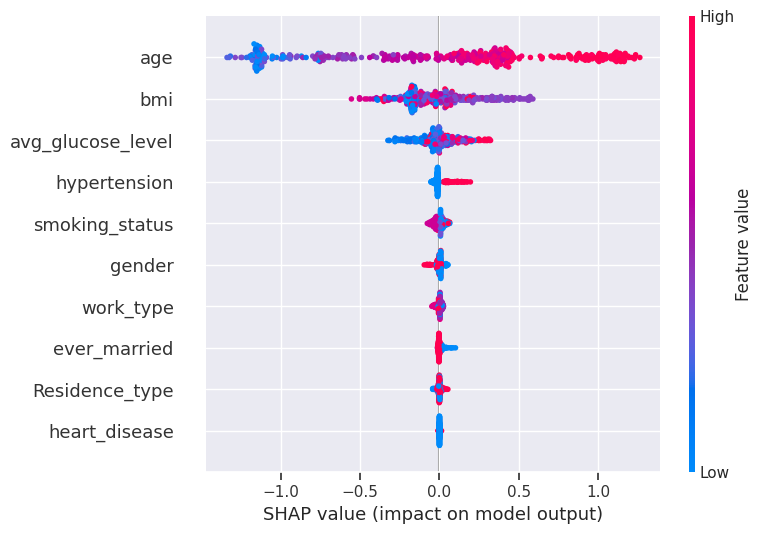

In [33]:
# Get feature names from the training data
feature_names = X.columns.tolist()

# Iterate over results to evaluate SHAP for 'UnderSampling' technique
for technique, models_info in results.items():
    # Skip non-'UnderSampling' techniques
    if technique != "UnderSampling":
        continue

    # Print evaluation message for XGBoost model
    print(f"\nEvaluating SHAP for XGBoost model under {technique}")

    # Extract XGBoost model info
    xgb_model_info = models_info['xgb']

    # Get the XGBoost model
    xgb_model = xgb_model_info['model']

    # Get training data for the current technique
    X_train, _ = train_data[technique]

    # Plot SHAP values for the XGBoost model
    plot_shap_values_xgb(xgb_model, X_train, 'XGBoost', feature_names)

Feature Contribution to Predictions

In [34]:
pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [43]:
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = 'notebook'

technique = "SMOTE"
model_name = "xgb"

# Get the trained model from results
rf_model = results[technique][model_name]["model"]

if hasattr(rf_model, "feature_importances_"):
    feature_importances = rf_model.feature_importances_

    # Explicitly map feature names
    feature_mapping = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

    feature_names = feature_mapping[:len(feature_importances)]

    trace = go.Scatter(
        y=feature_importances,
        x=feature_names,
        mode='markers',
        marker=dict(
            size=13,
            color=feature_importances,
            colorscale='Portland',
            showscale=True
        ),
        text=feature_names
    )

    layout = go.Layout(
        title='XGBoost Feature Importance (SMOTE)',
        hovermode='closest',
        xaxis=dict(
            tickangle=45,
            ticklen=5,
            showgrid=False,
            zeroline=False,
            showline=False
        ),
        yaxis=dict(
            title='Feature Importance',
            showgrid=False,
            zeroline=False,
            ticklen=5,
            gridwidth=2
        ),
        showlegend=False,
        plot_bgcolor='rgba(240, 240, 240, 0.95)'
    )

    fig = go.Figure(data=[trace], layout=layout)
    fig.show()
else:
    print("The XGBoost model does not support feature importances.")


Partial Dependence Analysis (PDP)

In [38]:
def plot_pdp_simple(model, X_train, feature_to_analyze, feature_names=None):
    try:
        # Handle feature names
        if feature_names is None:
            if isinstance(X_train, pd.DataFrame):
                feature_names = X_train.columns.tolist()
            else:
                raise ValueError("feature_names must be provided when X_train is a numpy array")

        # Convert numpy array to DataFrame temporarily if needed
        if isinstance(X_train, np.ndarray):
            X_train_df = pd.DataFrame(X_train, columns=feature_names)
            feature_idx = feature_names.index(feature_to_analyze)
        else:
            X_train_df = X_train
            feature_idx = X_train_df.columns.get_loc(feature_to_analyze)

        # Check model capabilities
        if not hasattr(model, 'predict_proba'):
            raise ValueError("Model must support predict_proba for PDP generation")

        # Generate PDP
        disp = PartialDependenceDisplay.from_estimator(
            estimator=model,
            X=X_train_df,
            features=[feature_idx],
            feature_names=feature_names,
            grid_resolution=50,
            kind='average'
        )

        # Customize plot
        disp.figure_.set_size_inches(10, 6)
        disp.axes_[0][0].set_title(f"Partial Dependence Plot for {feature_to_analyze}")
        disp.axes_[0][0].set_xlabel(feature_to_analyze)
        disp.axes_[0][0].set_ylabel("Partial Dependence")

        plt.show()

    except ValueError as ve:
        print(f"Validation Error: {str(ve)}")
    except Exception as e:
        print(f"Error generating PDP: {str(e)}")

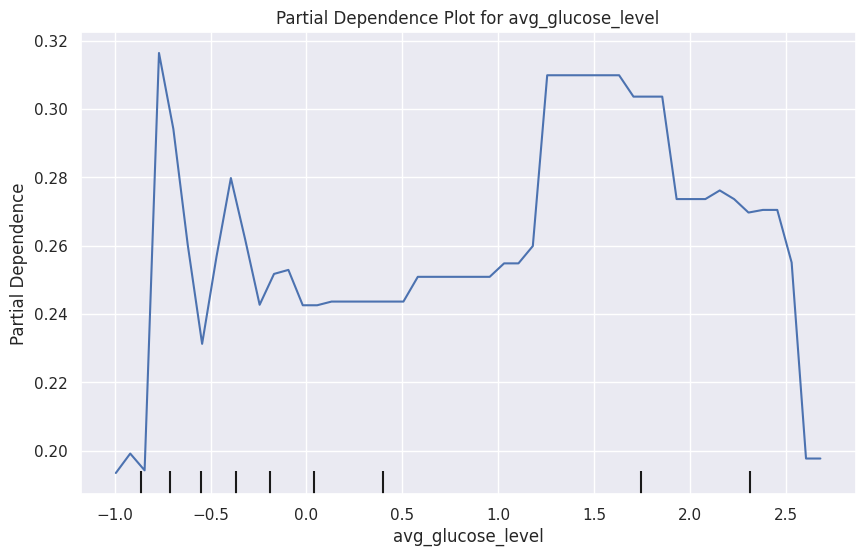

In [39]:
feature_names = X.columns.tolist()
plot_pdp_simple(rf_model, X_train, 'avg_glucose_level', feature_names=feature_names)

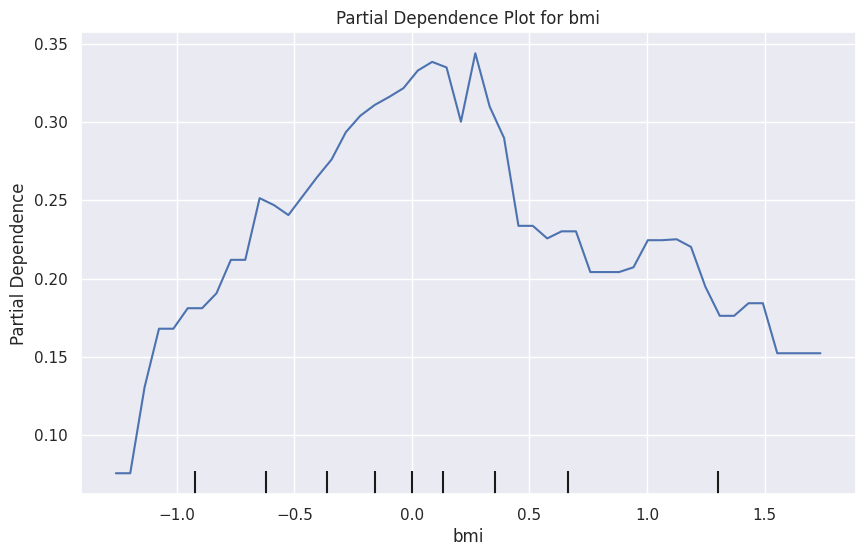

In [40]:
feature_names = X.columns.tolist()
plot_pdp_simple(rf_model, X_train, 'bmi', feature_names=feature_names)

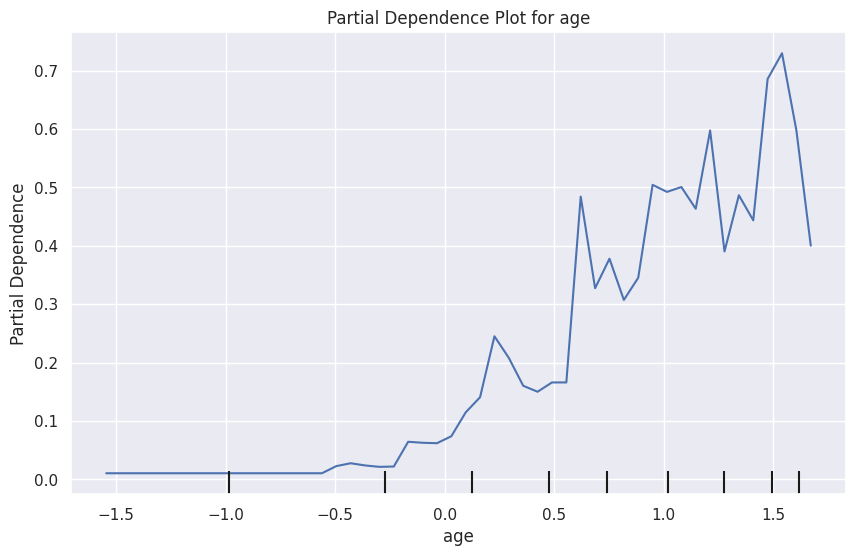

In [41]:
feature_names = X.columns.tolist()
plot_pdp_simple(rf_model, X_train, 'age', feature_names=feature_names)

Model Results

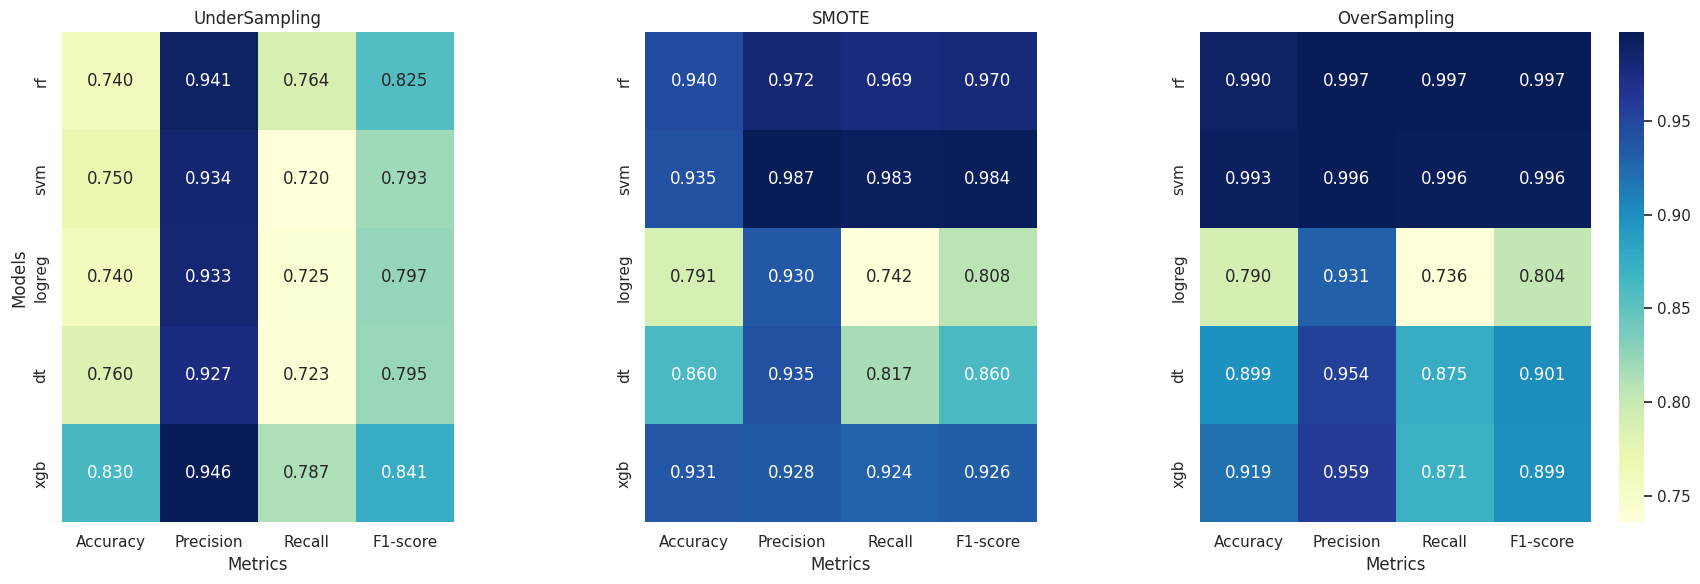

In [42]:
# Define the balancing techniques and metrics
techniques = ["UnderSampling", "SMOTE", "OverSampling"]
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Prepare data for heatmap visualization
heatmap_data = {}

for technique in techniques:
    data = []
    models = []
    for model_name, model_results in results[technique].items():
        models.append(model_name)
        accuracy = model_results["test_accuracy"]

        # Extract metrics from classification_report as a dictionary
        class_report = classification_report(y_test, model_results["model"].predict(X_test), output_dict=True)
        precision = class_report["weighted avg"]["precision"]
        recall = class_report["weighted avg"]["recall"]
        f1_score = class_report["weighted avg"]["f1-score"]

        data.append([accuracy, precision, recall, f1_score])

    heatmap_data[technique] = pd.DataFrame(data, index=models, columns=metrics)

# Create heatmaps for each balancing technique
fig, axes = plt.subplots(1, len(techniques), figsize=(18, 6))  # Adjust figsize to make heatmaps slightly larger

for i, technique in enumerate(techniques):
    sns.heatmap(
        heatmap_data[technique],
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        cbar=i == len(techniques) - 1,  # Show colorbar only on the last plot
        ax=axes[i],
        square=True  # Ensures square cells
    )
    axes[i].set_title(technique)
    axes[i].set_xlabel("Metrics")
    axes[i].set_ylabel("Models" if i == 0 else "")

plt.tight_layout()
plt.show()
